In [115]:
import pydicom
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from pathlib import Path
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt


In [167]:
dcm_paths = Path('/tmp/dicom3')
for dcm_path in dcm_paths.glob('*'):
    dcm = pydicom.dcmread(dcm_path)
    print(dcm.get('ImageOrientationPatient'),dcm_path)


[0.99970914218285, -0.0238391663002, 0.00365036794542, -3.48010098e-015, -0.1513606053152, -0.9884786123931] /tmp/dicom3/2.16.840.1.114570.2.2.136291.841761.961331.521541.841461.431634.213436.dcm
[0.99970914218285, -0.0238391663002, 0.00365036794542, -3.48010098e-015, -0.1513606053152, -0.9884786123931] /tmp/dicom3/2.16.840.1.114570.2.2.231052.158104.251527.718894.134481.911651.213366.dcm
[0.99970914218285, -0.0238391663002, 0.00365036794542, -3.48010098e-015, -0.1513606053152, -0.9884786123931] /tmp/dicom3/2.16.840.1.114570.2.2.215207.158306.025320.753320.621711.816715.213406.dcm
[0.99970914218285, -0.0238391663002, 0.00365036794542, -3.48010098e-015, -0.1513606053152, -0.9884786123931] /tmp/dicom3/2.16.840.1.114570.2.2.250864.381919.298512.695881.207920.620745.213421.dcm
[0.99970914218285, -0.0238391663002, 0.00365036794542, -3.48010098e-015, -0.1513606053152, -0.9884786123931] /tmp/dicom3/2.16.840.1.114570.2.2.216412.423711.691221.811311.412195.118208.213416.dcm
[0.99970914218285, -

In [170]:
localizer = pydicom.dcmread('/tmp/dicom3/2.16.840.1.114570.2.2.542101.692422.343118.228151.316616.512198.213341.dcm')
non_normal = pydicom.dcmread('/tmp/dicom3/2.16.840.1.114570.2.2.721962.522432.307212.611175.123217.435114.213386.dcm')
dcm1 = pydicom.dcmread('/tmp/dicom/IM0000')
dcm2 = pydicom.dcmread('/tmp/dicom/IM0049')

In [131]:
dcm_paths = Path('/tmp/dicom')
total_iop = []
total_ipp = []
for dcm_path in dcm_paths.glob('*'):
    dcm = pydicom.dcmread(dcm_path)
    total_iop.append(dcm.get('ImageOrientationPatient'))
    total_ipp.append(dcm.get('ImagePositionPatient'))
iops = np.array(total_iop)
ipps = np.array(total_ipp)


dcm_paths2 = Path('/tmp/dicom3')
total2_iop = []
total2_ipp = []
for dcm_path in dcm_paths2.glob('*'):
    dcm = pydicom.dcmread(dcm_path)
    total2_iop.append(dcm.get('ImageOrientationPatient'))
    total2_ipp.append(dcm.get('ImagePositionPatient'))
iops2 = np.array(total2_iop)
ipps2 = np.array(total2_ipp)

In [58]:
ipps_stand = (ipps - np.mean(ipps,axis=0))/np.std(ipps,axis=0) 
ipps2_stand = (ipps2 - np.mean(ipps2,axis=0))/np.std(ipps2,axis=0) 



In [64]:
ipps_cov = np.cov(ipps_stand.T)
ipps2_cov = np.cov(ipps2_stand.T)

val,vec = np.linalg.eig(ipps_cov)
val2,vec2 = np.linalg.eig(ipps2_cov)

In [207]:
eigs_exp = 100*val / np.sum(val)
eigs2_exp = 100*val2 / np.sum(val2)
sort = np.argsort(eigs2_exp)
vecs = vec2[sort[-2:]]
print(vecs)

[[ 0.57083015 -0.54221642  0.61656654]
 [ 0.62027051  0.77679652  0.10886533]]


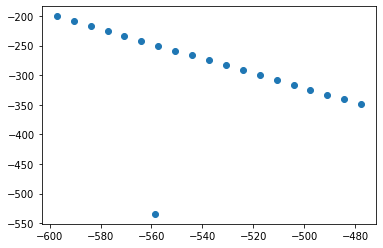

In [208]:

fig = plt.figure()
ax = fig.add_subplot(111)
points = ipps2.dot(vecs.T)
ax.scatter(points[:,0],points[:,1])

In [99]:
def pca(arr):
    arr_stand = (arr - np.mean(arr,axis=0)) / np.std(arr, axis=0)
    cov = np.cov(arr_stand.T)
    val, vec = np.linalg.eig(cov)
    exp = 100*val / np.sum(val)
    
    sort_ind = np.argsort(exp)
    explained = None
    
    explained_cand = exp[sort_ind]
    
    vecs = None
    print(explained_cand)
    if explained_cand[-1 ] > 95:
        explained = explained_cand[0]
        vecs = vec[sort_ind[-1:]]
    else:
        explained = np.sum(explained_cand[:1])
        vecs = vec[sort_ind[-2:]]

    
    return explained, vecs.T
    

[-3.74723516e-15 -3.89209476e-32  0.00000000e+00  4.07365350e-31
  3.86193083e-15  1.00000000e+02]


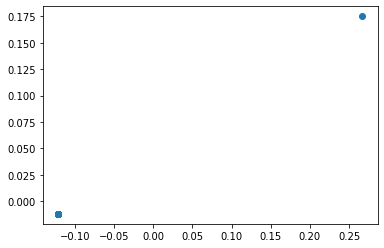

In [212]:
exp, vec = pca(iops2)
fig = plt.figure()
ax = fig.add_subplot(111)
points = iops2.dot(vec)
ax.scatter(points[:,0],points[:,1])

In [92]:
from sklearn.neighbors import LocalOutlierFactor
x = LocalOutlierFactor()
x.fit_predict(iops2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
np.std(l, axis=1)

array([4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08, 4.66476152e-08, 4.66476152e-08,
       4.66476152e-08, 4.66476152e-08])

In [27]:
x = GaussianMixture(n_components=5)
x.fit_predict(iops)

/Users/naterichman/Library/Caches/pypoetry/virtualenvs/work-dir-fnb3lQfF-py3.8/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [102]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

In [140]:
x = linkage(iops)
x2 = linkage(iops2)
cutoff = 3*np.max(np.std(iops2,axis=0))

In [154]:
dsts = pdist(iops2)
print(iops2.shape)
dist = np.mean(dsts)

(20, 6)


In [161]:
from sklearn.cluster import DBSCAN
import math

x = DBSCAN(eps=dist, min_samples=math.ceil(iops2.shape[1]/3))
x.fit_predict(ipps2)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [163]:
from scipy.spatial.distance import jensenshannon

In [201]:
def compute_dist(im1,im2):
    def hist(arr):
        arr = arr.ravel()
        arr = (arr - np.mean(arr)) / np.std(arr)
        return np.histogram(arr, bins=1000, range=(-5 ,5))
    
    h1 = hist(im1.pixel_array)[0]
    h2 = hist(im2.pixel_array)[0]
    return jensenshannon(h1,h2)
                                                    

In [202]:

for dcm_path in Path('/tmp/dicom3').glob('*'):
    dcm = pydicom.dcmread(dcm_path)
    dst_norm = compute_dist(dcm,non_normal)
    dist_loc = compute_dist(dcm,localizer)
    print(dcm_path.name,dist_loc,dst_norm,dst_norm < dist_loc)

2.16.840.1.114570.2.2.136291.841761.961331.521541.841461.431634.213436.dcm 0.68718712393108 0.6490459468769284 True
2.16.840.1.114570.2.2.231052.158104.251527.718894.134481.911651.213366.dcm 0.7341494629511413 0.3644519138450451 True
2.16.840.1.114570.2.2.215207.158306.025320.753320.621711.816715.213406.dcm 0.7191859577070544 0.37703790783537433 True
2.16.840.1.114570.2.2.250864.381919.298512.695881.207920.620745.213421.dcm 0.5425204957582441 0.7463248647609095 False
2.16.840.1.114570.2.2.216412.423711.691221.811311.412195.118208.213416.dcm 0.6709703359592126 0.6937191215313223 False
2.16.840.1.114570.2.2.216187.172230.220104.220156.439278.262142.213371.dcm 0.73463979784547 0.412627536332602 True
2.16.840.1.114570.2.2.511313.718022.821516.225066.164121.201507.213411.dcm 0.6897925416617846 0.5706549546267056 True
2.16.840.1.114570.2.2.601115.426255.911708.911337.133190.693210.213346.dcm 0.6902423104923032 0.457680836689656 True
2.16.840.1.114570.2.2.201324.128904.748761.964823.330245.34

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [204]:
x = LocalOutlierFactor()
x.fit_predict(iops2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])